## **TD : Herbicide**

Nous souhaitons étudier l’efficacité de trois herbicides sur trois plantes : blé, chiendent et liseron. Pour
cela, des cultures de ces plantes ont été mises en présence de l’un des trois herbicides, ou d’aucun
d’entre eux. Le nombre de plants vivants dans la culture a été compté avant l’expérience, et 10 jours
après. Chaque combinaison plante - herbicide a fait l’objet de 20 expérimentations, plus un témoin sans
herbicide (soit 240 expérimentations en tout).

### Lecture des donnés :

In [102]:
import numpy as np
import pandas as pd

df = pd.read_csv('http://germain-forestier.info/dataset/herbicide.csv', index_col='ID')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 240
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   herbicide             240 non-null    object
 1   plante                240 non-null    object
 2   nb_plants             240 non-null    int64 
 3   nb_plants_survivants  240 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.4+ KB
None


In [103]:
print(df.head())

   herbicide plante  nb_plants  nb_plants_survivants
ID                                                  
1      aucun    ble         82                    80
2      aucun    ble         99                    97
3      aucun    ble        116                   101
4      aucun    ble        110                   104
5      aucun    ble         96                    90


### Calculer la moyenne du nombre de plants initial, son écart type, ainsi que les valeurs minimum et maximum

In [104]:
# Votre code ici
mean_plan = np.mean(df["nb_plants"])
stddev_plan = np.std(df["nb_plants"])
min_plan = np.min(df["nb_plants"])
max_plan = np.max(df["nb_plants"])

print("Mean = ", mean_plan)
print("StdDev = ", stddev_plan)
print("Min = ", min_plan)
print("Max = ", max_plan)

Mean =  100.49583333333334
StdDev =  10.72069568508603
Min =  80
Max =  119


 ### Corrigé

In [105]:
print(np.mean(df['nb_plants']))
print(np.std(df['nb_plants']))
print(np.max(df['nb_plants']))
print(np.min(df['nb_plants']))

100.49583333333334
10.72069568508603
119
80


### Calculer le pourcentage de plantes ayant survécu pour chaque expérimentation, et l’ajouter dans une nouvelle colonne

In [106]:
# Votre code ici
## No need to use numpy
# survivants = np.array(df.loc[:,"nb_plants_survivants"]) / np.array(df.loc[:,"nb_plants"])
# print(survivants)
# df["survivants"] = survivants.tolist()


df["survivants"] = df["nb_plants_survivants"] / df["nb_plants"]
print(df.head())


   herbicide plante  nb_plants  nb_plants_survivants  survivants
ID                                                              
1      aucun    ble         82                    80    0.975610
2      aucun    ble         99                    97    0.979798
3      aucun    ble        116                   101    0.870690
4      aucun    ble        110                   104    0.945455
5      aucun    ble         96                    90    0.937500


 ### Corrigé

In [107]:
df['survivants'] = df['nb_plants_survivants'] / df['nb_plants']

print(df.head())

# del df['survivants']
# print(df.head())

   herbicide plante  nb_plants  nb_plants_survivants  survivants
ID                                                              
1      aucun    ble         82                    80    0.975610
2      aucun    ble         99                    97    0.979798
3      aucun    ble        116                   101    0.870690
4      aucun    ble        110                   104    0.945455
5      aucun    ble         96                    90    0.937500


### Combien d’expérimentations ont donné lieu à moins de 5% de plants survivants

In [108]:
# Votre code ici
df_filtered = df[df["survivants"]<0.05]

print(df_filtered["survivants"].count())

23


### Corrigé

In [109]:
print(len(df[df['survivants'] < 0.05]))
print(df[df['survivants'] < 0.05].head())

23
     herbicide     plante  nb_plants  nb_plants_survivants  survivants
ID                                                                    
81  herbicide1  chiendent        115                     0         0.0
82  herbicide1  chiendent         87                     0         0.0
88  herbicide1  chiendent         90                     0         0.0
90  herbicide1  chiendent        118                     0         0.0
94  herbicide1  chiendent         87                     0         0.0


### Extraire les lignes du tableau qui correspondent à l'absence d’herbicide et les mettre dans une nouvelle variable que l’on appellera `temoin`

In [118]:
# Votre code ici
temoin = df[df["herbicide"] == "aucun"]
print(temoin.head())

df = df[df["herbicide"] != "aucun"]
print(df.head())

   herbicide plante  nb_plants  nb_plants_survivants  survivants
ID                                                              
1      aucun    ble         82                    80    0.975610
2      aucun    ble         99                    97    0.979798
3      aucun    ble        116                   101    0.870690
4      aucun    ble        110                   104    0.945455
5      aucun    ble         96                    90    0.937500
     herbicide plante  nb_plants  nb_plants_survivants  survivants
ID                                                                
61  herbicide1    ble         87                    86    0.988506
62  herbicide1    ble         91                    69    0.758242
63  herbicide1    ble         99                    89    0.898990
64  herbicide1    ble         91                    78    0.857143
65  herbicide1    ble         81                    69    0.851852


 ### Corrigé

In [92]:
temoin = df[df['herbicide'] == 'aucun']
print(temoin.head(5))

# ou
#temoin = df[df['herbicide'].str.contains('aucun')]
#print(temoin.head(5))

df = df[df['herbicide'] != 'aucun']
print(df.head(5))

Empty DataFrame
Columns: [herbicide, plante, nb_plants, nb_plants_survivants, survivants]
Index: []
     herbicide plante  nb_plants  nb_plants_survivants  survivants
ID                                                                
61  herbicide1    ble         87                    86    0.988506
62  herbicide1    ble         91                    69    0.758242
63  herbicide1    ble         99                    89    0.898990
64  herbicide1    ble         91                    78    0.857143
65  herbicide1    ble         81                    69    0.851852


### Calculer la moyenne et l’écart type du pourcentage de plants ayant survécus sur le témoin

In [119]:
# Votre code ici
print("Mean survived = ", np.mean(temoin["survivants"]))
print("StdDev = ", np.std(temoin["survivants"]))

Mean survived =  0.9375639605302007
StdDev =  0.047038294699495914


### Corrigé

In [120]:
print(np.mean(temoin['survivants']))
print(np.std(temoin['survivants']))

0.9375639605302007
0.047038294699495914


### De la même manière, calculer la moyenne et l’écart type du pourcentage de plants ayant survécus pour chacun des trois herbicides. Quel herbicide vous semble le plus efficace globalement ?

In [121]:
# Votre code ici
print("Herbicide1")
print("Mean survived = ", np.mean(df[df["herbicide"] == "herbicide1"]['survivants']))
print("StdDev = ", np.std(df[df["herbicide"] == "herbicide1"]['survivants']))

print("\nHerbicide2")
print("Mean survived = ", np.mean(df[df["herbicide"] == "herbicide2"]['survivants']))
print("StdDev = ", np.std(df[df["herbicide"] == "herbicide2"]['survivants']))

print("\nHerbicide3")
print("Mean survived = ", np.mean(df[df["herbicide"] == "herbicide3"]['survivants']))
print("StdDev = ", np.std(df[df["herbicide"] == "herbicide3"]['survivants']))


Herbicide1
Mean survived =  0.6166904482292644
StdDev =  0.3204826371044665

Herbicide2
Mean survived =  0.5596953527038421
StdDev =  0.2567466162081569

Herbicide3
Mean survived =  0.11179451780864179
StdDev =  0.07853301298000033


 ### Corrigé

In [122]:
herbicide1 = df[df['herbicide'] == 'herbicide1']
herbicide2 = df[df['herbicide'] == 'herbicide2']
herbicide3 = df[df['herbicide'] == 'herbicide3']

print(np.mean(herbicide1['survivants']))
print(np.std(herbicide1['survivants']))
print()
print(np.mean(herbicide2['survivants']))
print(np.std(herbicide2['survivants']))
print()
print(np.mean(herbicide3['survivants']))
print(np.std(herbicide3['survivants']))
print()

herbicide_list = df['herbicide'].unique()

for h in herbicide_list:
    print('Resultat pour ['+h+']')
    subset = df[df['herbicide'] == h]
    print('mean: '+str(np.mean(subset['survivants'])))
    print('std: '+str(np.std(subset['survivants'])))
    print('')

0.6166904482292644
0.3204826371044665

0.5596953527038421
0.2567466162081569

0.11179451780864179
0.07853301298000033

Resultat pour [herbicide1]
mean: 0.6166904482292644
std: 0.3204826371044665

Resultat pour [herbicide2]
mean: 0.5596953527038421
std: 0.2567466162081569

Resultat pour [herbicide3]
mean: 0.11179451780864179
std: 0.07853301298000033



### Quelle plante est celle qui a le mieux résisté aux herbicides, dans l’ensemble ?

In [127]:
# Votre code ici
plant_list = df['plante'].unique()
mean_list=list()

for p in plant_list:
    print(p)
    subset = df[df['plante'] == p]
    mean_list.append(np.mean(subset['survivants']))
    print('mean: '+str(np.mean(subset['survivants'])))
    print('std: '+str(np.std(subset['survivants']))+"\n")

print("The plant that survived the best is :\n",
      plant_list[np.argmax(mean_list)] )

ble
mean: 0.5676322096813067
std: 0.33315352520780184

chiendent
mean: 0.35683112062047
std: 0.29065174701971247

liseron
mean: 0.36371698843997186
std: 0.32181494611074657

The plant that survived the best is :
 ble


 ### Corrigé

In [48]:
plante_list = df['plante'].unique()

for p in plante_list:
    print('Resultat pour ['+p+']')
    subset = df[df['plante'] == p]
    print('mean: '+str(np.mean(subset['survivants'])))
    print('std: '+str(np.std(subset['survivants'])))
    print('')


Resultat pour [ble]
mean: 0.5676322096813067
std: 0.33315352520780184

Resultat pour [chiendent]
mean: 0.35683112062047
std: 0.29065174701971247

Resultat pour [liseron]
mean: 0.36371698843997186
std: 0.32181494611074657



### Tracer un histogramme représentant le taux de plantes survivantes.

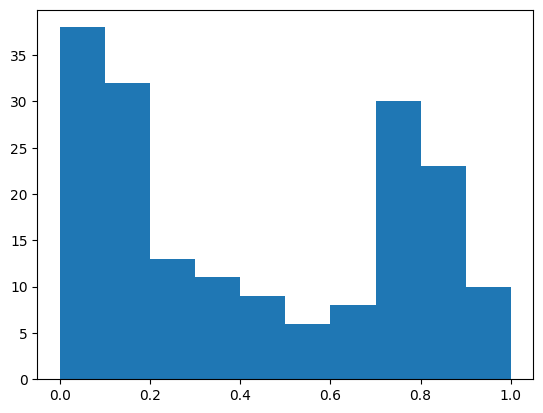

In [179]:
# Votre code ici
import matplotlib.pyplot as plt

plt.hist(df['survivants'])
plt.show()

### Corrigé

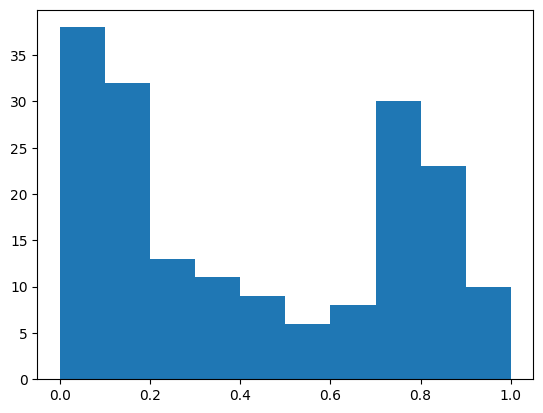

In [50]:
import matplotlib.pyplot as plt

plt.hist(df['survivants'])
plt.show()

### Tracer un camembert représentant la proportion des différentes plantes dans l’étude.

ble 
nb = 60 

chiendent 
nb = 60 

liseron 
nb = 60 



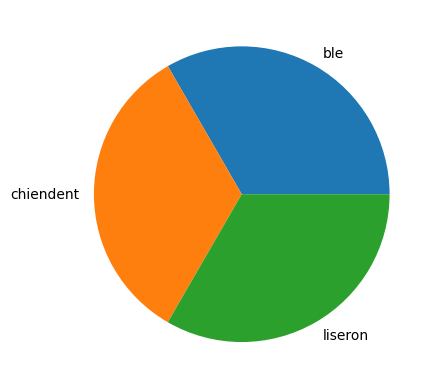

In [178]:
# Votre code ici
plant_unique = df['plante'].unique()
proportions=list()

for p in plant_unique:
    df_filtered = df[df['plante'] == p]
    proportions.append(df_filtered["plante"].count())
    print(p,
          "\nnb =", df_filtered["plante"].count(), "\n")

plt.pie(proportions, labels=plant_unique)
plt.show()

 ### Corrigé

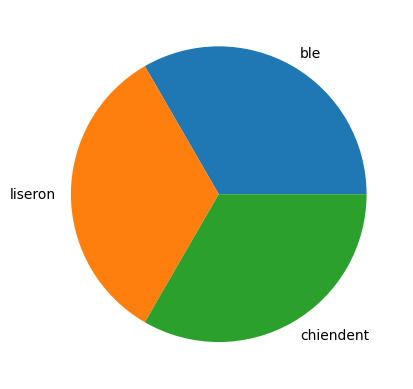

In [147]:
plt.pie(df['plante'].value_counts(), labels=['ble','liseron','chiendent'])
plt.show()

### Tracer un graphique représentant le taux de survivants en fonction de l’espèce de plante. Dans l’ensemble, quelle espèce résiste le mieux aux trois herbicides ? (utiliser `boxplot()`)

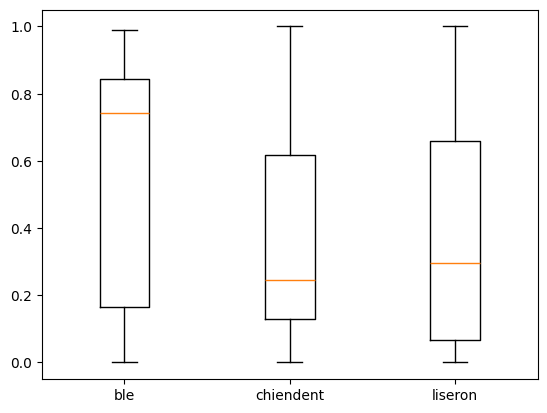

In [164]:
# Votre code ici
plant_unique = df["plante"].unique()
l=list()

for p in plant_unique:
    df_filtered = df[df["plante"] == p]
    l.append(df_filtered["survivants"])

plt.boxplot(l)
plt.xticks(list(range(1,len(l)+1)), plant_unique.tolist())
plt.show()

 ### Corrigé

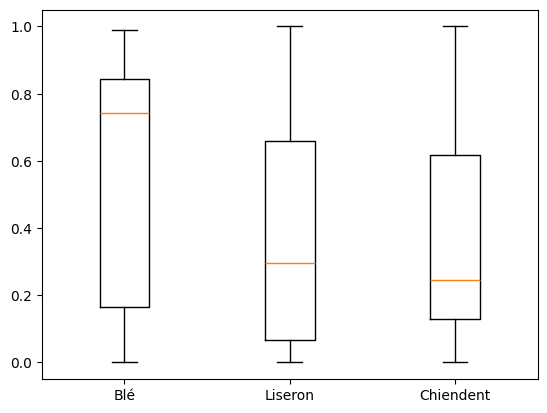

In [177]:
ble = df[df['plante'] == 'ble']
liseron = df[df['plante'] == 'liseron']
chiendent = df[df['plante'] == 'chiendent']

crop = [ble['survivants'], liseron['survivants'], chiendent['survivants']]
plt.boxplot(crop)
plt.xticks([1,2,3],['Blé', 'Liseron', 'Chiendent'])
plt.show()

### Tracer un graphique représentant le taux de survivants en fonction de l’herbicide. Dans l’ensemble, quel herbicide semble le plus efficace ? (utiliser `boxplot()`)

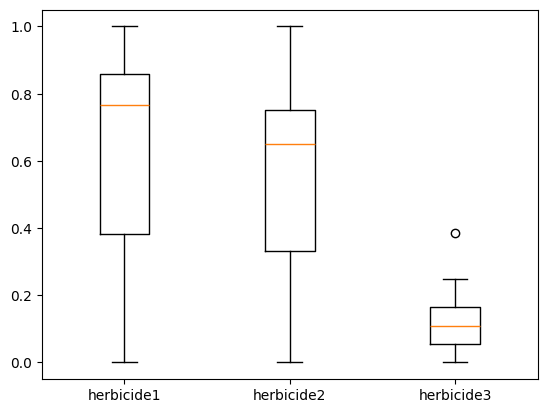

In [167]:
# Votre code ici
herbicide_unique = df["herbicide"].unique()
l=list()

for h in herbicide_unique:
    df_filtered = df[df["herbicide"] == h]
    l.append(df_filtered["survivants"])

plt.boxplot(l)
plt.xticks(list(range(1,len(l)+1)), herbicide_unique.tolist())
plt.show()

 ### Corrigé

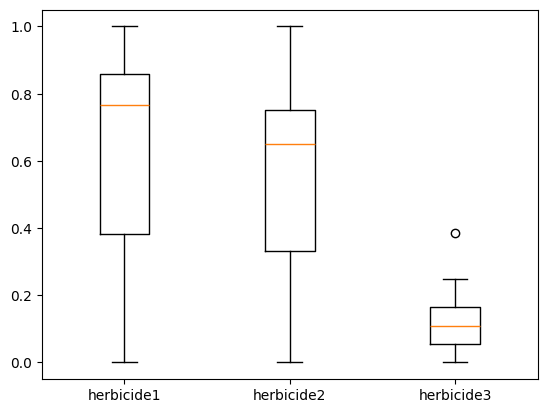

In [168]:
crop = [herbicide1['survivants'], herbicide2['survivants'], herbicide3['survivants']]
plt.boxplot(crop)
plt.xticks([1,2,3],['herbicide1', 'herbicide2', 'herbicide3'])
plt.show()

### Tracer un diagramme de dispersion des taux de survivants en fonction de l’herbicide puis en fonction des types de plantes. (utiliser `stripplot()` de `seaborn`)

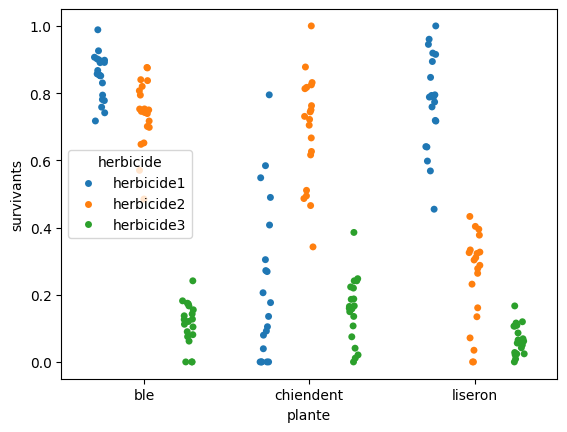

In [176]:
# Votre code ici
from seaborn import stripplot

# # Herbicide
# stripplot(df, x="herbicide", y="survivants")

# # Plant
# stripplot(df, x="plante", y="survivants")

stripplot(df, x="plante", y="survivants", hue="herbicide", dodge=True)
plt.show()

 ### Corrigé

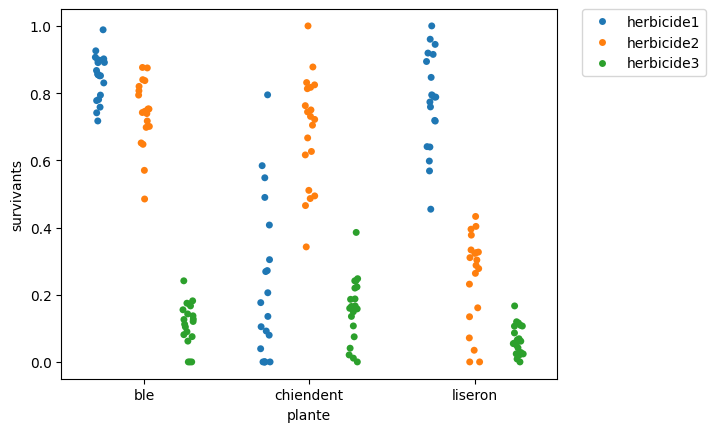

In [58]:
import seaborn as sns

sns.stripplot(x=df['plante'], y=df['survivants'], hue=df['herbicide'], data=df, dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Tracer un graphique représentant le taux de survivants en fonction de l’herbicide et de l’espèce de plante.

Commenter l’efficacité de chaque herbicide sur chaque type de plante. Commencer par construire un tableau 2D contenant les taux moyens de survie pour chaque plante et chaque herbicide (3 × 3). Utiliser pour cela la fonction `pivot_table()` de pandas. Afficher ensuite une heatmap de ce tableau 2D à l’aide de la méthode seaborn : `heatmap()`

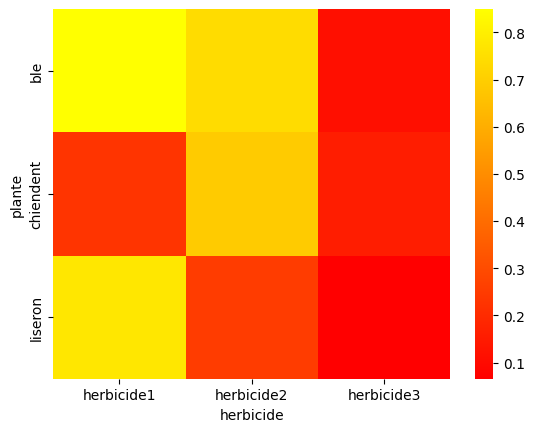

In [186]:
# Votre code ici
from seaborn import heatmap

table = pd.pivot_table(df, values="survivants", index="plante", columns="herbicide")

heatmap(table, cmap="autumn")
plt.show()

 ### Corrigé

/tmp/ipykernel_2424022/2114093522.py:3: FutureWarning: The provided callable <function mean at 0x7f645c7ee610> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df_sansTemoin, values='survivants',


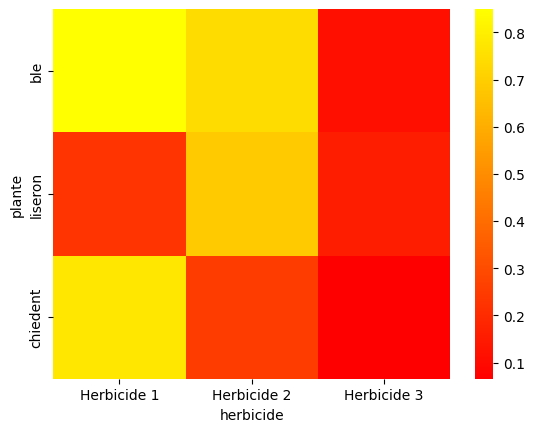

In [188]:
df_sansTemoin = df[df['herbicide'] != 'aucun']

table = pd.pivot_table(df_sansTemoin, values='survivants',
                       index=['plante'],
                         columns=['herbicide'], aggfunc=np.mean)
ax = sns.heatmap(table,cmap='autumn')
ax.set_yticklabels(['ble', 'liseron', 'chiedent'])
ax.set_xticklabels(['Herbicide 1', 'Herbicide 2', 'Herbicide 3'])
plt.show()

### Clairance de Cockcroft

1.  Charger le fichier cockroft.csv
2.  Représenter graphiquement l’âge des patientes, et leur poids.
3.  Calculer la clairance rénale pour chaque patient, et la mettre dans une nouvelle colonne du tableau de donnée, que l’on appellera “clairance cockroft”.
4.  Représenter graphiquement la clairance rénale mesurée chez les patientes en fonction de la clairance calculée.
5.  Ajouter un titre au graphique précédent, et modifier les axes pour qu’ils indiquent “Clairance calculée par la formule de Cockroft” et “Clairance mesurée sur les urines de 24h”.



File ‘cockroft.csv’ already there; not retrieving.



   ID   sexe  age      poids  creatininemie  clairance
0   1  femme   91  68.534941      78.486180  50.241635
1   2  femme   81  68.160326      63.709815  56.157025
2   3  femme   92  50.942883      60.647172  49.811978
3   4  femme   96  62.970640      90.902534  21.556270
4   5  femme   91  60.824009      81.577166  23.183725


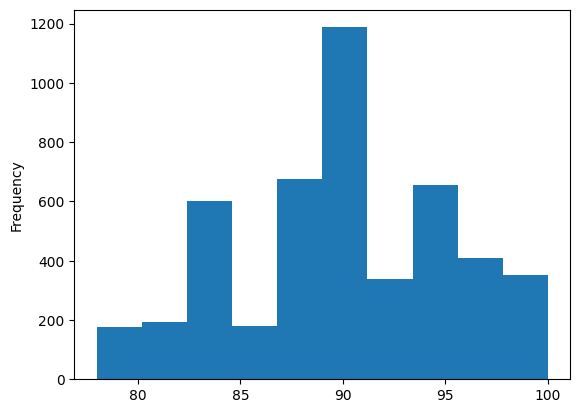

In [197]:
# Votre code ici
# 1.
!wget -nc http://germain-forestier.info/dataset/cockroft.csv
df=pd.read_csv("cockroft.csv")
print(df.head())

# 2.
df["age"].plot(kind="hist", weights=df["poids"])
plt.show()

# 3.

# 4.

# 5.


 ### Corrigé

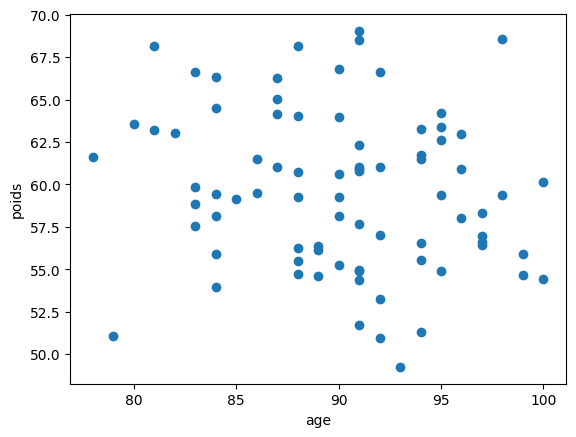

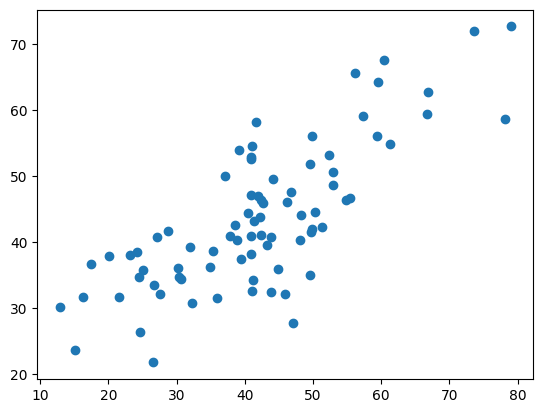

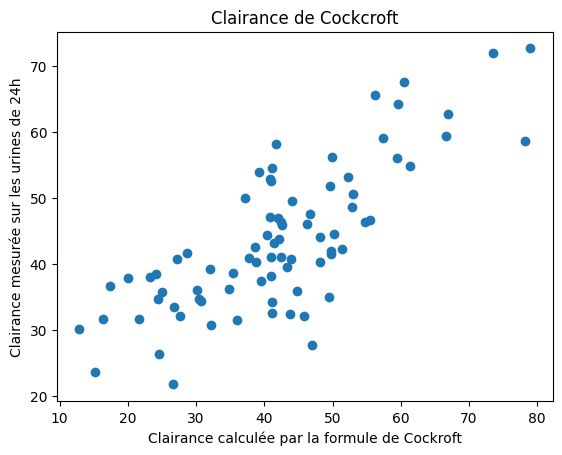

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier cockroft.csv
df = pd.read_csv('http://germain-forestier.info/dataset/cockroft.csv')

# Représenter graphiquement l’âge des patientes, et leur poids.
plt.scatter(df["age"],df["poids"])
plt.ylabel('poids')
plt.xlabel('age')
plt.show()

# Calculer la clairance rénale pour chaque patient
df["clairance cockroft"] = ((140 - df["age"]) * df["poids"] * 1.04) / df["creatininemie"]

# Représenter graphiquement la clairance rénale
plt.scatter(df["clairance"],df["clairance cockroft"])
plt.show()

#Ajouter un titre au graphique précédent
plt.scatter(df["clairance"],df["clairance cockroft"])
plt.xlabel("Clairance calculée par la formule de Cockroft")
plt.ylabel("Clairance mesurée sur les urines de 24h")
plt.title("Clairance de Cockcroft")
plt.show()